In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_validation import train_test_split 
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
tickets = pd.read_csv('~/Datasets/airline.csv')

In [3]:
tickets.head()

,Unnamed: 0,ItinID,FarePerMile,Coupons,Origin,RoundTrip,OnLine,RPCarrier,Passengers,ItinFare,BulkFare,Distance,DistanceGroup,MilesFlown,OriginState
0,303,201611931654,0.3505,2,ORD,0.0,1.0,DL,1.0,416.0,0.0,1187.0,3,1187.0,IL
1,304,201611935662,0.8851,2,ORD,1.0,1.0,DL,1.0,416.0,0.0,470.0,1,470.0,IL
2,464,201612288325,0.3562,2,ORD,1.0,1.0,EV,1.0,416.0,0.0,1168.0,3,1168.0,IL
3,465,201612288420,0.5086,2,ORD,1.0,0.0,EV,1.0,416.0,0.0,818.0,2,818.0,IL
4,466,201612288910,0.2737,2,ORD,1.0,0.0,EV,1.0,416.0,0.0,1520.0,4,1520.0,IL


In [4]:
tickets.isnull().sum()

Unnamed: 0       0
ItinID           0
FarePerMile      0
Coupons          0
Origin           0
RoundTrip        0
OnLine           0
RPCarrier        0
Passengers       0
ItinFare         0
BulkFare         0
Distance         0
DistanceGroup    0
MilesFlown       0
OriginState      0
dtype: int64

# EDA

In [5]:
tickets.shape

(123086, 15)

In [6]:
tickets.corr()

,Unnamed: 0,ItinID,FarePerMile,Coupons,RoundTrip,OnLine,Passengers,ItinFare,BulkFare,Distance,DistanceGroup,MilesFlown
Unnamed: 0,1.000000,-0.043635,-0.074984,0.514145,0.164347,-0.197722,-0.093143,0.244461,NaN,0.289079,0.287439,0.279095
ItinID,-0.043635,1.000000,0.116424,-0.067241,-0.009427,0.002662,-0.012712,-0.022657,NaN,-0.146532,-0.143366,-0.146555
FarePerMile,-0.074984,0.116424,1.000000,-0.249469,-0.187428,0.014739,-0.075430,0.298878,NaN,-0.433051,-0.427641,-0.434393
Coupons,0.514145,-0.067241,-0.249469,1.000000,0.529316,-0.381468,-0.114784,0.264324,NaN,0.537046,0.534743,0.529238
RoundTrip,0.164347,-0.009427,-0.187428,0.529316,1.000000,-0.202568,-0.011121,0.256498,NaN,0.362516,0.358755,0.360742
OnLine,-0.197722,0.002662,0.014739,-0.381468,-0.202568,1.000000,0.140218,-0.090924,NaN,-0.021370,-0.021762,-0.009162
Passengers,-0.093143,-0.012712,-0.075430,-0.114784,-0.011121,0.140218,1.000000,-0.135531,NaN,-0.009770,-0.011116,-0.007931
ItinFare,0.244461,-0.022657,0.298878,0.264324,0.256498,-0.090924,-0.135531,1.000000,NaN,0.311157,0.310981,0.309425
BulkFare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,0.289079,-0.146532,-0.433051,0.537046,0.362516,-0.021370,-0.009770,0.311157,NaN,1.000000,0.993134,0.997754


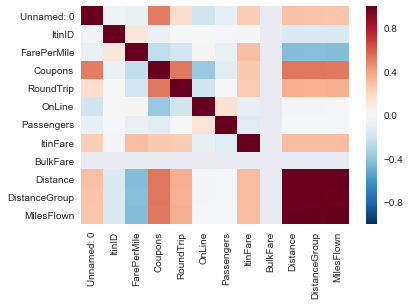

In [7]:
sns.heatmap(tickets.corr())

In [ ]:
## distance, distance group and miles flown are the same thing

## ItinFare

Target

Could be log-transformed -- it helps

In [8]:
tickets['ItinFare'].describe()

count    123086.000000
mean        393.376322
std         197.107510
min         101.000000
25%         241.000000
50%         356.000000
75%         506.000000
max        1000.000000
Name: ItinFare, dtype: float64

(array([ 17172.,  24579.,  23530.,  19532.,  13436.,   9223.,   6343.,
          4326.,   2917.,   2028.]),
 array([  101. ,   190.9,   280.8,   370.7,   460.6,   550.5,   640.4,
          730.3,   820.2,   910.1,  1000. ]),
 <a list of 10 Patch objects>)

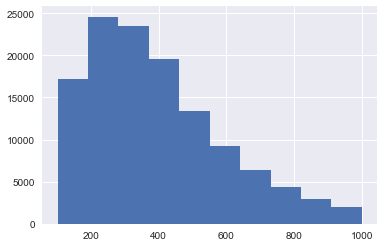

In [9]:
plt.hist(tickets['ItinFare'])

(array([  4188.,   5687.,   9978.,  14139.,  17587.,  20872.,  19318.,
         14989.,  10403.,   5925.]),
 array([ 4.61512052,  4.84438399,  5.07364747,  5.30291095,  5.53217442,
         5.7614379 ,  5.99070137,  6.21996485,  6.44922833,  6.6784918 ,
         6.90775528]),
 <a list of 10 Patch objects>)

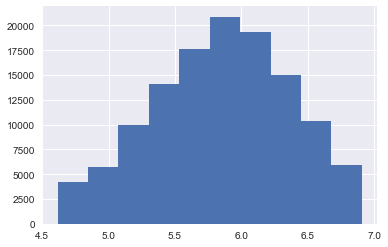

In [10]:
plt.hist(np.log(tickets['ItinFare']))

## Origin

one dummy variable: is_ord

In [11]:
tickets['Origin'].value_counts()

ORD    100159
MDW     22927
Name: Origin, dtype: int64

## Coupons

leave as int. transforming doesn't really help.

In [12]:
tickets['Coupons'].describe()

count    123086.000000
mean          2.120322
std           0.852858
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: Coupons, dtype: float64

In [13]:
tickets['Coupons'].value_counts()

2    73486
1    23918
3    13686
4    11144
5      684
6      144
7       20
9        2
8        2
Name: Coupons, dtype: int64

(array([  2.39180000e+04,   7.34860000e+04,   1.36860000e+04,
          1.11440000e+04,   0.00000000e+00,   6.84000000e+02,
          1.44000000e+02,   2.00000000e+01,   2.00000000e+00,
          2.00000000e+00]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]),
 <a list of 10 Patch objects>)

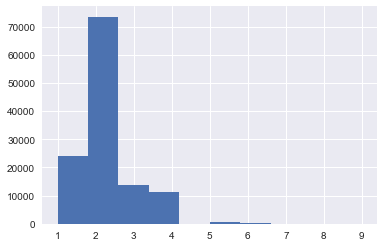

In [14]:
plt.hist(tickets['Coupons'])

(array([  2.39180000e+04,   0.00000000e+00,   7.34860000e+04,
          1.36860000e+04,   0.00000000e+00,   1.11440000e+04,
          6.84000000e+02,   1.44000000e+02,   2.00000000e+01,
          4.00000000e+00]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

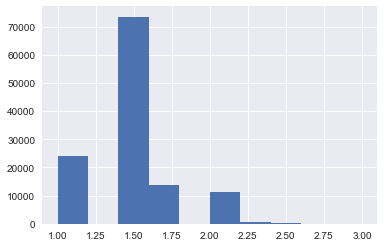

In [15]:
## try with a square-root transform

plt.hist(np.sqrt(tickets['Coupons']))

(array([  2.39180000e+04,   0.00000000e+00,   0.00000000e+00,
          7.34860000e+04,   0.00000000e+00,   1.36860000e+04,
          1.11440000e+04,   6.84000000e+02,   1.64000000e+02,
          4.00000000e+00]),
 array([ 0.        ,  0.21972246,  0.43944492,  0.65916737,  0.87888983,
         1.09861229,  1.31833475,  1.5380572 ,  1.75777966,  1.97750212,
         2.19722458]),
 <a list of 10 Patch objects>)

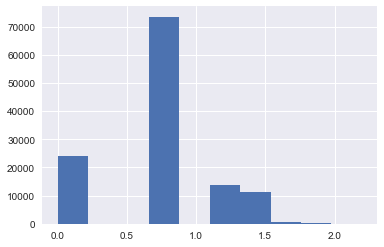

In [16]:
## try with a log transform

plt.hist(np.log(tickets['Coupons']))

## Online

dummy variable. keep it as-is

In [17]:
tickets['OnLine'].value_counts()

1.0    87441
0.0    35645
Name: OnLine, dtype: int64

## RPCarrier

airline. need to make dummies here. Should probably just use top 3 (AA, UA, WN)

could also add the next four (MQ, OO, DL, EV)

3rd tier: YX, G7, S5, NK

In [18]:
tickets['RPCarrier'].value_counts()

AA    30028
UA    27629
WN    19962
MQ     8379
OO     6906
DL     6199
EV     5880
YX     3699
G7     3604
S5     3051
NK     2726
B6      997
F9      976
AS      974
9E      943
CP      566
VX      557
YV       10
Name: RPCarrier, dtype: int64

## Passengers

probably shouldn't use this. the variance is pretty low, and it's strongly non-normal even with transformation

In [19]:
tickets['Passengers'].describe()

count    123086.000000
mean          2.324749
std           5.355503
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         259.000000
Name: Passengers, dtype: float64

(array([  1.17148000e+05,   3.21300000e+03,   1.25900000e+03,
          5.15000000e+02,   3.55000000e+02,   1.63000000e+02,
          1.24000000e+02,   7.60000000e+01,   5.50000000e+01,
          3.70000000e+01,   2.80000000e+01,   1.60000000e+01,
          1.90000000e+01,   1.00000000e+01,   1.10000000e+01,
          1.10000000e+01,   9.00000000e+00,   7.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   1.  ,    7.45,   13.9 ,   20.35,   26.8 ,   33.25,   39.7 ,
          46.15,   52.6 ,   59.05,   65.5 ,   71.95,   78.4 ,   84.85,
          91.3 ,   97.75

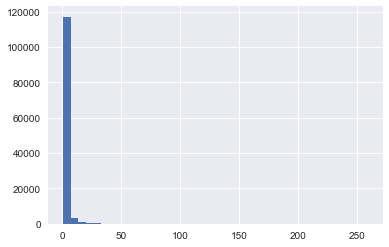

In [20]:
## this has some outliers that will probably be a problem

plt.hist(tickets['Passengers'], bins=40)

In [21]:
## 1466 rows with passengers larger than 20

tickets[tickets['Passengers'] > 20].shape

(1466, 15)

(array([ 88450.,      0.,  14361.,      0.,   6083.,      0.,   3455.,
             0.,   2206.,      0.,      0.,   1543.,      0.,   1050.,
             0.,    874.,      0.,    676.,      0.,      0.,    566.,
             0.,    428.,      0.,    368.,      0.,    301.,      0.,
           283.,      0.,      0.,    219.,      0.,    214.,      0.,
           158.,      0.,    155.,      0.,    115.]),
 array([  1.  ,   1.45,   1.9 ,   2.35,   2.8 ,   3.25,   3.7 ,   4.15,
          4.6 ,   5.05,   5.5 ,   5.95,   6.4 ,   6.85,   7.3 ,   7.75,
          8.2 ,   8.65,   9.1 ,   9.55,  10.  ,  10.45,  10.9 ,  11.35,
         11.8 ,  12.25,  12.7 ,  13.15,  13.6 ,  14.05,  14.5 ,  14.95,
         15.4 ,  15.85,  16.3 ,  16.75,  17.2 ,  17.65,  18.1 ,  18.55,  19.  ]),
 <a list of 40 Patch objects>)

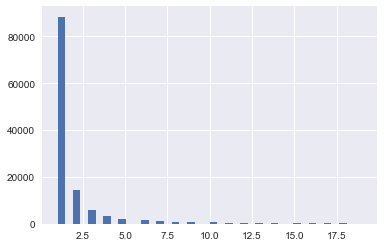

In [22]:
## drop the outliers above 20

plt.hist(tickets[tickets['Passengers']<20]['Passengers'], bins=40)

(array([  8.84500000e+04,   0.00000000e+00,   0.00000000e+00,
          1.43610000e+04,   0.00000000e+00,   6.08300000e+03,
          0.00000000e+00,   3.45500000e+03,   2.20600000e+03,
          1.54300000e+03,   1.05000000e+03,   1.55000000e+03,
          9.94000000e+02,   6.69000000e+02,   7.16000000e+02,
          4.28000000e+02,   4.14000000e+02,   3.48000000e+02,
          2.23000000e+02,   1.86000000e+02,   1.28000000e+02,
          9.80000000e+01,   7.00000000e+01,   3.60000000e+01,
          2.90000000e+01,   2.00000000e+01,   1.60000000e+01,
          6.00000000e+00,   6.00000000e+00,   1.00000000e+00]),
 array([ 0.        ,  0.1852276 ,  0.3704552 ,  0.55568281,  0.74091041,
         0.92613801,  1.11136561,  1.29659321,  1.48182082,  1.66704842,
         1.85227602,  2.03750362,  2.22273122,  2.40795883,  2.59318643,
         2.77841403,  2.96364163,  3.14886923,  3.33409684,  3.51932444,
         3.70455204,  3.88977964,  4.07500725,  4.26023485,  4.44546245,
         4.63

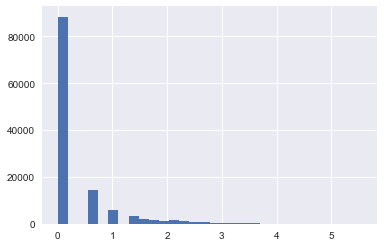

In [23]:
## try it with a log transform

plt.hist(np.log(tickets['Passengers']), bins=30)

## BulkFare

This is empty

In [24]:
tickets['BulkFare'].describe()

count    123086.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: BulkFare, dtype: float64

## Distance

log-transform improves distribution

In [25]:
tickets['Distance'].describe()

count    123086.000000
mean       1865.977317
std        1260.047352
min          67.000000
25%         977.000000
50%        1650.000000
75%        2368.000000
max       11598.000000
Name: Distance, dtype: float64

(array([  4.19200000e+04,   5.05930000e+04,   2.01020000e+04,
          8.65200000e+03,   3.75000000e+02,   1.13000000e+02,
          1.40000000e+01,   1.29500000e+03,   2.10000000e+01,
          1.00000000e+00]),
 array([    67. ,   1220.1,   2373.2,   3526.3,   4679.4,   5832.5,
          6985.6,   8138.7,   9291.8,  10444.9,  11598. ]),
 <a list of 10 Patch objects>)

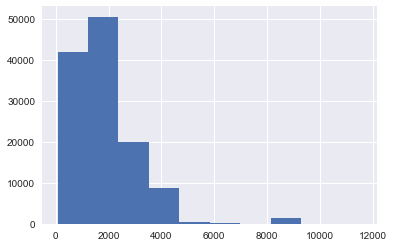

In [26]:
plt.hist(tickets['Distance'])

(array([    87.,    554.,   2343.,   6153.,  18939.,  26911.,  40336.,
         22892.,   3539.,   1332.]),
 array([ 4.20469262,  4.72008215,  5.23547169,  5.75086122,  6.26625075,
         6.78164028,  7.29702982,  7.81241935,  8.32780888,  8.84319842,
         9.35858795]),
 <a list of 10 Patch objects>)

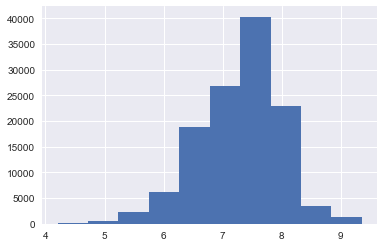

In [27]:
## distribution with log transform
plt.hist(np.log(tickets['Distance']))

(array([  3.43600000e+03,   1.89000000e+04,   2.91750000e+04,
          3.79680000e+04,   1.65730000e+04,   1.50550000e+04,
          5.58000000e+02,   9.70000000e+01,   1.31100000e+03,
          1.30000000e+01]),
 array([   8.18535277,   18.13621859,   28.08708441,   38.03795023,
          47.98881605,   57.93968187,   67.89054769,   77.84141351,
          87.79227933,   97.74314516,  107.69401098]),
 <a list of 10 Patch objects>)

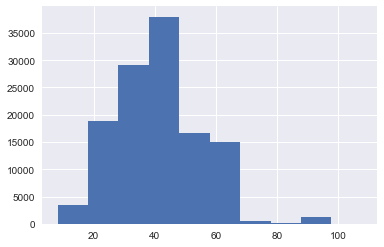

In [28]:
## distribution with square root transform. log transform looks a little bit better

plt.hist(np.sqrt(tickets['Distance']))

## MilesFlown

this is the same thing as distance, so don't use it

(array([  4.22500000e+04,   5.06960000e+04,   2.00510000e+04,
          8.31500000e+03,   3.38000000e+02,   1.15000000e+02,
          1.60000000e+01,   1.28500000e+03,   1.90000000e+01,
          1.00000000e+00]),
 array([    67. ,   1220.1,   2373.2,   3526.3,   4679.4,   5832.5,
          6985.6,   8138.7,   9291.8,  10444.9,  11598. ]),
 <a list of 10 Patch objects>)

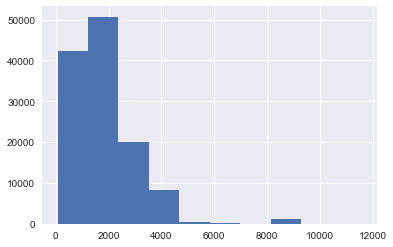

In [29]:
plt.hist(tickets['MilesFlown'])

## Round trip

already a dummy variable. keep it here.

In [30]:
tickets['RoundTrip'].describe()

count    123086.000000
mean          0.707977
std           0.454695
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: RoundTrip, dtype: float64

In [31]:
tickets['RoundTrip'].value_counts()

1.0    87142
0.0    35944
Name: RoundTrip, dtype: int64

## OriginState

it's all just illinois

In [32]:
tickets['OriginState'].value_counts()

IL    123086
Name: OriginState, dtype: int64

In [33]:
tickets.dtypes

Unnamed: 0         int64
ItinID             int64
FarePerMile      float64
Coupons            int64
Origin            object
RoundTrip        float64
OnLine           float64
RPCarrier         object
Passengers       float64
ItinFare         float64
BulkFare         float64
Distance         float64
DistanceGroup      int64
MilesFlown       float64
OriginState       object
dtype: object

In [34]:
tickets.columns

Index([u'Unnamed: 0', u'ItinID', u'FarePerMile', u'Coupons', u'Origin',
       u'RoundTrip', u'OnLine', u'RPCarrier', u'Passengers', u'ItinFare',
       u'BulkFare', u'Distance', u'DistanceGroup', u'MilesFlown',
       u'OriginState'],
      dtype='object')

# Feature Building

In [35]:
## log ItinFare
tickets['log_fare'] = np.log(tickets['ItinFare'])

In [36]:
## origin
tickets['from_ord'] = tickets['Origin'].apply(lambda x: 1 if x=="ORD" else 0)

In [ ]:
## leave coupons and online as-is

In [37]:
## RPCarrier

# carriers = ['AA', 'UA', 'WA', 'MQ', 'OO', 'DL', 'EV', 'YX', 'G7', 'S5', 'NK']
carriers = list(set(list(tickets['RPCarrier'])))
for i in carriers:
    tickets['carrier_'+i] = tickets['RPCarrier'].apply(lambda x: 1 if x==i else 0)

In [38]:
## distance

tickets['log_distance'] = np.log(tickets['Distance'])

In [ ]:
## round trip is already good

In [39]:
tickets.columns

Index([u'Unnamed: 0', u'ItinID', u'FarePerMile', u'Coupons', u'Origin',
       u'RoundTrip', u'OnLine', u'RPCarrier', u'Passengers', u'ItinFare',
       u'BulkFare', u'Distance', u'DistanceGroup', u'MilesFlown',
       u'OriginState', u'log_fare', u'from_ord', u'carrier_G7', u'carrier_OO',
       u'carrier_DL', u'carrier_NK', u'carrier_AA', u'carrier_WN',
       u'carrier_9E', u'carrier_B6', u'carrier_S5', u'carrier_YX',
       u'carrier_AS', u'carrier_MQ', u'carrier_F9', u'carrier_VX',
       u'carrier_CP', u'carrier_EV', u'carrier_UA', u'carrier_YV',
       u'log_distance'],
      dtype='object')

# defining terms

In [40]:
y = tickets['log_fare']
x = tickets[['from_ord', 'Coupons', 'OnLine', 'carrier_AA', 'carrier_UA', 
             'carrier_MQ', u'carrier_OO',
             u'carrier_DL', u'carrier_EV', u'carrier_YX', u'carrier_G7',
             u'carrier_S5', u'carrier_NK', u'carrier_WN', u'carrier_9E',
             u'carrier_B6', u'carrier_AS', u'carrier_F9', u'carrier_VX',
             u'carrier_CP', 'log_distance', 'RoundTrip']]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [42]:
x.corr()

,from_ord,Coupons,OnLine,carrier_AA,carrier_UA,carrier_MQ,carrier_OO,carrier_DL,carrier_EV,carrier_YX,...,carrier_NK,carrier_WN,carrier_9E,carrier_B6,carrier_AS,carrier_F9,carrier_VX,carrier_CP,log_distance,RoundTrip
from_ord,1.000000,-0.060079,-0.217136,0.271778,0.257399,0.129309,0.094068,-0.046787,0.053838,0.084216,...,0.072003,-0.919588,0.011404,0.043235,0.042730,0.042774,0.032258,-0.090243,-0.036980,-0.004783
Coupons,-0.060079,1.000000,-0.381468,0.061707,-0.002817,-0.112298,-0.037336,0.220807,-0.047858,-0.052508,...,-0.027382,-0.000979,0.028901,-0.010624,0.022450,-0.037424,-0.024699,0.039692,0.543659,0.529316
OnLine,-0.217136,-0.381468,1.000000,0.012760,-0.066233,0.030971,-0.128276,-0.011614,-0.081562,-0.061038,...,0.096087,0.254619,-0.069212,0.052901,-0.014745,0.057081,0.038778,-0.066212,-0.052529,-0.202568
carrier_AA,0.271778,0.061707,0.012760,1.000000,-0.305608,-0.153528,-0.138495,-0.130817,-0.127233,-0.099988,...,-0.085489,-0.249924,-0.049912,-0.051333,-0.050733,-0.050785,-0.038300,-0.038609,0.184272,0.017594
carrier_UA,0.257399,-0.002817,-0.066233,-0.305608,1.000000,-0.145405,-0.131168,-0.123896,-0.120501,-0.094698,...,-0.080966,-0.236701,-0.047272,-0.048617,-0.048048,-0.048098,-0.036273,-0.036567,0.171485,0.046093
carrier_MQ,0.129309,-0.112298,0.030971,-0.153528,-0.145405,1.000000,-0.065894,-0.062241,-0.060536,-0.047573,...,-0.040675,-0.118911,-0.023748,-0.024424,-0.024138,-0.024163,-0.018223,-0.018370,-0.275436,-0.042574
carrier_OO,0.094068,-0.037336,-0.128276,-0.138495,-0.131168,-0.065894,1.000000,-0.056147,-0.054609,-0.042915,...,-0.036692,-0.107268,-0.021422,-0.022032,-0.021774,-0.021797,-0.016438,-0.016571,-0.128915,-0.006855
carrier_DL,-0.046787,0.220807,-0.011614,-0.130817,-0.123896,-0.062241,-0.056147,1.000000,-0.051581,-0.040536,...,-0.034658,-0.101321,-0.020235,-0.020811,-0.020567,-0.020589,-0.015527,-0.015652,-0.015078,-0.071714
carrier_EV,0.053838,-0.047858,-0.081562,-0.127233,-0.120501,-0.060536,-0.054609,-0.051581,1.000000,-0.039426,...,-0.033708,-0.098545,-0.019680,-0.020241,-0.020004,-0.020025,-0.015102,-0.015224,-0.187081,-0.002756
carrier_YX,0.084216,-0.052508,-0.061038,-0.099988,-0.094698,-0.047573,-0.042915,-0.040536,-0.039426,1.000000,...,-0.026490,-0.077444,-0.015466,-0.015906,-0.015720,-0.015737,-0.011868,-0.011964,-0.103065,0.008707


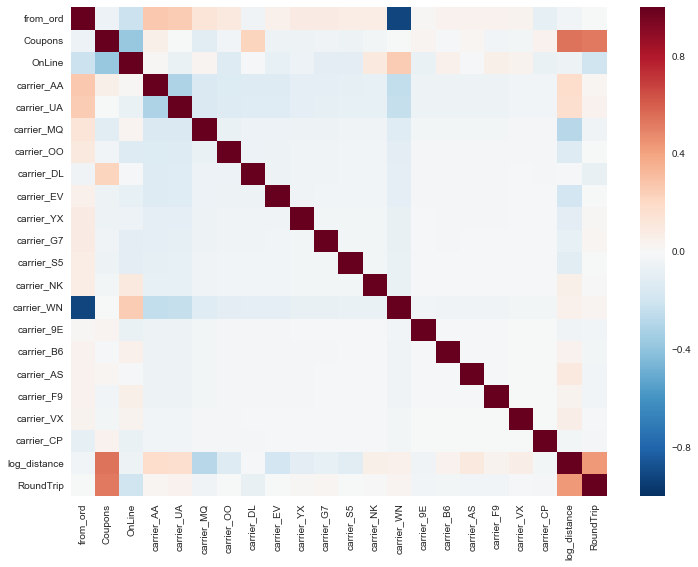

In [43]:
## a couple of strong correlations here, but I'm not going to worry about it
plt.figure(figsize=(12,9))
sns.heatmap(x.corr())

## Modeling

In [44]:
def run_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print "Training set score: ", model.score(x_train, y_train)
    print "Test set score: ", model.score(x_test, y_test)
    plt.scatter(y_test, predictions, marker='x', s=0.1, alpha=0.4)
    plt.title('Predictions vs Actual')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()


In [45]:
lm = LinearRegression(n_jobs=-1)

In [46]:
rf = RandomForestRegressor(n_jobs=-1)

In [47]:
et = ExtraTreesRegressor(n_jobs = -1)

In [48]:
ada = AdaBoostRegressor(base_estimator=lm)

In [49]:
gbm = GradientBoostingRegressor()

Training set score:  0.231273346972
Test set score:  0.233864463682


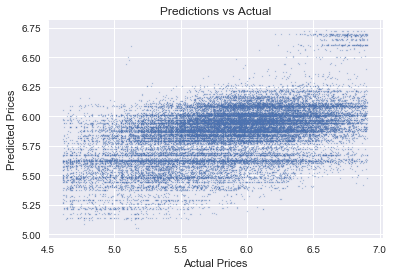

In [50]:
run_model(x_train, y_train, x_test, y_test, gbm)

# os.system("say MODEL IS DONE")

In [51]:
models = [lm, rf, et, ada, gbm]

Model:  LinearRegression
Model Hyperparameters:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
Training set score:  0.193787150608
Test set score:  0.197997903197


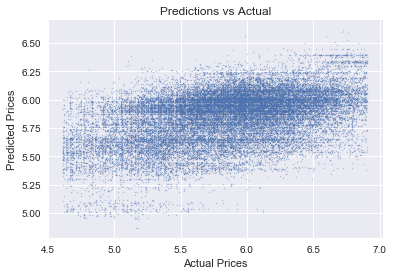



Model:  RandomForestRegressor
Model Hyperparameters:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training set score:  0.373186857216
Test set score:  0.268173632165


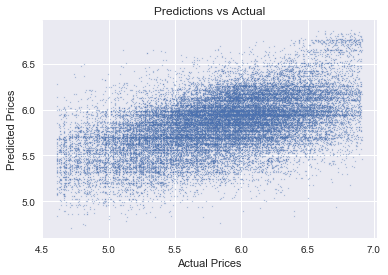



Model:  ExtraTreesRegressor
Model Hyperparameters:
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)
Training set score:  0.38589536795
Test set score:  0.252391594654


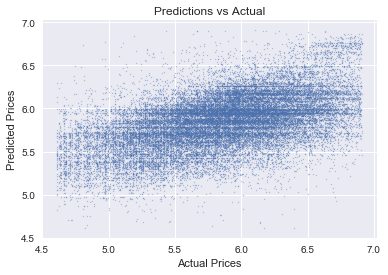



Model:  AdaBoostRegressor
Model Hyperparameters:
AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)
Training set score:  0.190087590246
Test set score:  0.193775615239


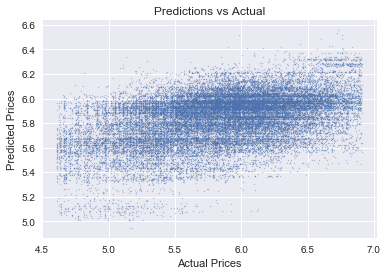



Model:  GradientBoostingRegressor
Model Hyperparameters:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Training set score:  0.231273346972
Test set score:  0.233864463682


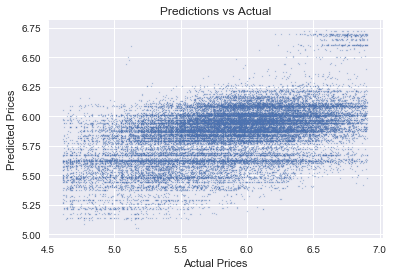

In [52]:
for i in models:
    print "Model: ", str(i).split("(")[0]
    print "Model Hyperparameters:\n", i
    run_model(x_train, y_train, x_test, y_test, i)
    print '\n'
    